# LABORATORIO 2 - Práctica 2: Patrones Secuenciales
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Apartado 1](#id1)
1. [Apartado 2](#id2)
1. [Apartado 3 y 4](#id3)

---

<div id='id0'>

## *Introducción*
---
En esta práctica se quiere construir un clasificador que nos proporcione una serie de reglas de manera que cuando una persona vaya al campo y encuentre una seta pueda saber si esta es venenosa o no.

Para ello  usaremos  el  dataset  “Setas”  que  se  encuentra  en  Moodle:  mushroom.csv  tendrá  la  información necesaria para entrenar y evaluar el modelo e info.txt la equivalencia a las etiquetas usadas en el dataset. La primera columna es la que indica siuna seta es venenosa o no. Elige el clasificador que más se adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

---

### Importar Librerías
---

In [25]:
import numpy as np
import pandas as pd
import sklearn
import apyori
import matplotlib.pyplot as plt
import gsppy
import random
import seaborn as sns
from gsppy.gsp import GSP

### Leemos el fichero splice.data
---

Leemos el fichero con los datos de las secuencias de ADN y le añadimos un índice a las columnas correspondientes para poder identificarlas

In [26]:
#Lee el fichero splice.data en un dataframe
data = pd.read_csv('splice.data', delimiter=',')
#Añade los nombres a las columnas
data.columns = ["Tipo", "Nombre", "Secuencia"]

data.head(5)

,Tipo,Nombre,Secuencia
0,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...
1,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...
2,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...
3,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...
4,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTA...


**Añadimos una nueva columna donde se añadiran la secuencia acortada en grupos de 4 a 10, esta la inicializamos con None para ser mas simple**

In [27]:
#Crea una columna que contendrá las secuencias acortadas copn valores por defecto "None"
data = data.assign(Secuencia_Acortada = "None")
data.head(5)

,Tipo,Nombre,Secuencia,Secuencia_Acortada
0,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...,None
1,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...,None
2,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...,None
3,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...,None
4,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTA...,None


<div id='id1'>

## *Apartado 1*: Generar   una   nueva   columna que debe contener los primeros dígitos de los genes siendo este   número   aleatorio   entre   4 y 10

---

Generamos las secuencias acortadas de tamaño aleatorio entre 4 y 10 para cada fila en un DataFrame llamado "data". 

- Primero, itera a través de cada fila en el DataFrame y extrae la columna de la secuencia de ADN en cada fila. 
- Luego, elimina los espacios en la secuencia y genera un número aleatorio entre 4 y 10. 
- Finalmente, actualiza la columna de la secuencia en esa fila con los primeros n caracteres de la secuencia original, donde n es el número aleatorio generado previamente

In [28]:
#Genera secuencias acortadas de tamaño aleatorio entre 4 y 10
for row in data.iterrows():
    aux =row[1][2]
    for caracter in aux:
        #Elimina los espacios
        cadena = aux.replace(" ", "")
    # Genera un número aleatorio del 4 al 10
    numero_aleatorio = random.randint(4, 10)
    row[1][3] = row[1][3].replace("None",cadena[:numero_aleatorio])
        
data.head(5)

,Tipo,Nombre,Secuencia,Secuencia_Acortada
0,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...,AGACC
1,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...,GAGGTGA
2,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...,GGGCTGCGTT
3,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...,GCTCAG
4,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTA...,CAGACTGG


<div id='id2'>

## *Apartado 2*: Comprobación de datos
-----

Creamos una lista vacía llamada "lista" con la misma cantidad de elementos que el conjunto de datos. Luego, se recorre el conjunto de datos y se verifica si la secuencia de la clase está vacía o es nula. Si es así, se imprime un mensaje y se sale del programa. De lo contrario, se recorre cada caracter de la secuencia de la clase y se agrega a la lista si no se encuentra ya presente. Por último, se incrementa un contador para avanzar al siguiente elemento en la lista.

In [29]:
#Crea una lista vacía del tamaño del dataset
lista = [[] for i in range(len(data))]
lista_aux = []
cont = 0
#Añade a la lista la secuencia de la clase comprobando si está vacía y eliminando el contenido repetido
for row in data.iterrows():
    if row[1][3] == " " or row[1][3] == None:
        print("Hay clases vacías")
    else:
        if row[1][3] not in lista:
            lista_aux.append(row[1][3])

for string in lista_aux:
    for char in string:
        lista[cont].append(char)
    cont += 1



<div id='id3'>

## *Apartado 3 y Apartado 4*: Pruebas con varias configuraciones e Interpretación de algunos de los patrones 

### (Interpretamos patrones secuenciales de la primera configuración)
---

**Configuración 1 con soporte de 5%**

El resultado de la función GSP(lista).search(0.05) es una lista de conjuntos de patrones frecuentes. 
Cada conjunto está compuesto por tuplas de longitud variable que representan las secuencias de ADN más frecuentes. 
La función search toma un parámetro que es el umbral de soporte mínimo para que un patrón sea considerado frecuente. En este caso, se ha fijado en un 5% (0.05).

---------------------------------------------------------------------------------------------------------------------------------------------------

El código imprime los patrones extraídos en orden descendente de frecuencia. Cada patrón se imprime en una línea separada, con su frecuencia correspondiente, en el formato (patrón): frecuencia.

Por ejemplo:

- El primer patrón  impreso es ('A',): 2543, lo que significa que el carácter 'A' aparece en 2543 de las secuencias de ADN de la lista.
- El segundo patrón impreso es ('G',): 2566, lo que significa que el carácter 'G' aparece en 2566 de las secuencias de ADN de la lista, y así sucesivamente para todos los patrones.
- Se descartan los patrones que no cumplen con la frecuencia minima seleccionada, en este caso 5% y se continuan realizando patrones. 
- Se imprimen los patrones de longitud dos y tres más frecuentes, que se representan como tuplas de dos y tres elementos respectivamente. Por ejemplo, ('A', 'C')indica que la secuencia 'AC' aparece en 936 de las secuencias de ADN de la lista.

In [30]:
#Usa la libreia gsppy para utilizar el algoritmo GSP con un soporte mínimo especificado
result1 = GSP(lista).search(0.05)
for count in result1:
    for k, v in count.items():
        print(f"{k}: {v}")
    print()

('A',): 2543
('G',): 2566
('C',): 2644
('T',): 2581

('A', 'A'): 843
('C', 'C'): 1103
('A', 'G'): 1097
('A', 'C'): 936
('C', 'G'): 474
('C', 'A'): 1163
('G', 'A'): 1089
('C', 'T'): 1433
('A', 'T'): 882
('G', 'C'): 1092
('G', 'G'): 980
('T', 'C'): 1062
('T', 'A'): 598
('T', 'T'): 789
('T', 'G'): 1244
('G', 'T'): 720

('A', 'A', 'A'): 217
('C', 'A', 'A'): 251
('A', 'A', 'G'): 287
('A', 'G', 'A'): 286
('A', 'G', 'G'): 288
('A', 'G', 'C'): 298
('A', 'A', 'T'): 218
('A', 'T', 'C'): 194
('A', 'A', 'C'): 195
('A', 'C', 'A'): 228
('C', 'A', 'C'): 256
('A', 'C', 'C'): 290
('A', 'T', 'T'): 235
('A', 'T', 'G'): 226
('A', 'C', 'T'): 246
('C', 'A', 'G'): 362
('C', 'C', 'A'): 357
('C', 'C', 'C'): 304
('C', 'A', 'T'): 234
('C', 'C', 'T'): 405
('C', 'T', 'A'): 171
('C', 'T', 'C'): 380
('C', 'T', 'G'): 480
('C', 'T', 'T'): 290
('G', 'A', 'A'): 299
('G', 'A', 'C'): 258
('G', 'A', 'G'): 297
('G', 'A', 'T'): 204
('G', 'C', 'A'): 236
('G', 'C', 'C'): 331
('G', 'C', 'T'): 384
('G', 'G', 'A'): 340
('G', 'G',

**Con este código mostramos en una gráfica las distintas secuencias de elementos según su frecuencia. De esta manera nos permite comparar las distintas frecuencias de patrones obtenidos por el algoritmo**:

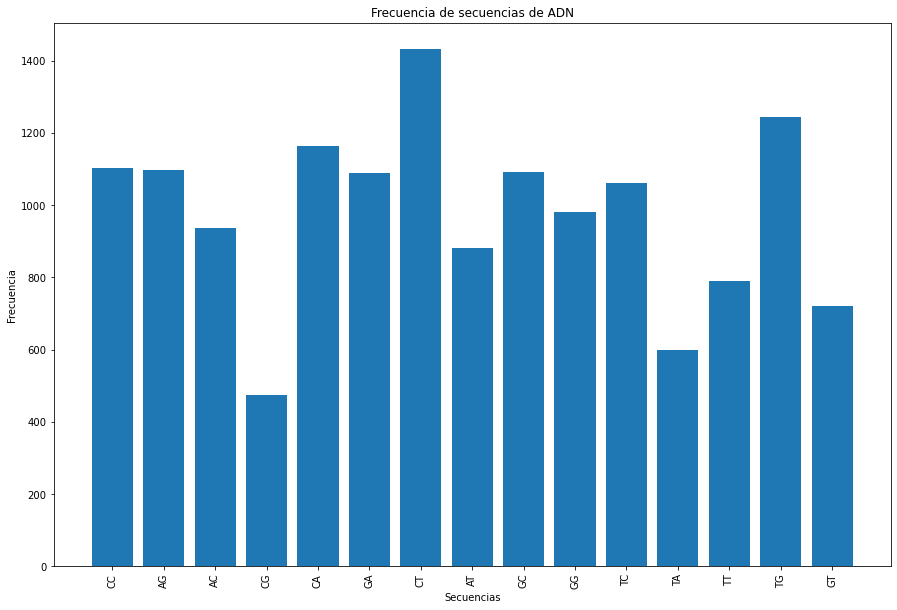

In [59]:
# Obtener las secuencias y las cuentas de cada secuencia
seq_types = []
seq_counts = []
for d in result1:
    for seq, count in d.items():
        seq_types.append(seq)
        seq_counts.append(count)
# Convertir las tuplas en strings
seq_types_str = ["".join(t) for t in seq_types]

seq_types2 = seq_types_str[5:20]
seq_counts2 = seq_counts[5:20]

seq_types3 = seq_types_str[21:]
seq_counts3 = seq_counts[21:]

# Crear la gráfica de barras utilizando los datos
fig, ax = plt.subplots(figsize = (15,10))
ax.bar(seq_types2, seq_counts2)

# Configurar las etiquetas de los ejes y el título de la gráfica
ax.set_xlabel('Secuencias')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de secuencias de ADN')

# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()


**Patrones Analizados:**
- El patron '(C,G)' aparece 474 veces en las secuencias ADN en contraste con su secuencia contraria '(G,C)' apareciendo 1092 veces doblandole en apariciones, esto quiere decir que es mas probable que en las secuencias de ADN  aparezca el gen 'C' dado que anteriormente ha aparecido el gen 'G', a que este aparezca directamente como primer gen.

- Al igual que en anterior caso el patron '(T,A)' aparece 598 veces en las secuencias ADN en contraste con su secuencia contraria '(A,T)' apareciendo 882 veces, aunque la diferencia sea menor sigue diciendo que es mas probable que en las secuencias de ADN  aparezca el gen 'T' dado que anteriormente ha aparecido el gen 'A', a que este aparezca directamente como primer gen.

- El patron '(C,T)', es el más común con 1433 apariciones, queriendo decir que existe una fuerte correlacion entre la aparicion del gen 'C' en primera instancia con el gen 'T' en segunda instancia

- De los patrones cuya combinación esta formada por 2 elementos del mismo tipo, se puede observar que el patrón '(C,C)' , es el que mas veces se repite con 1103 veces.

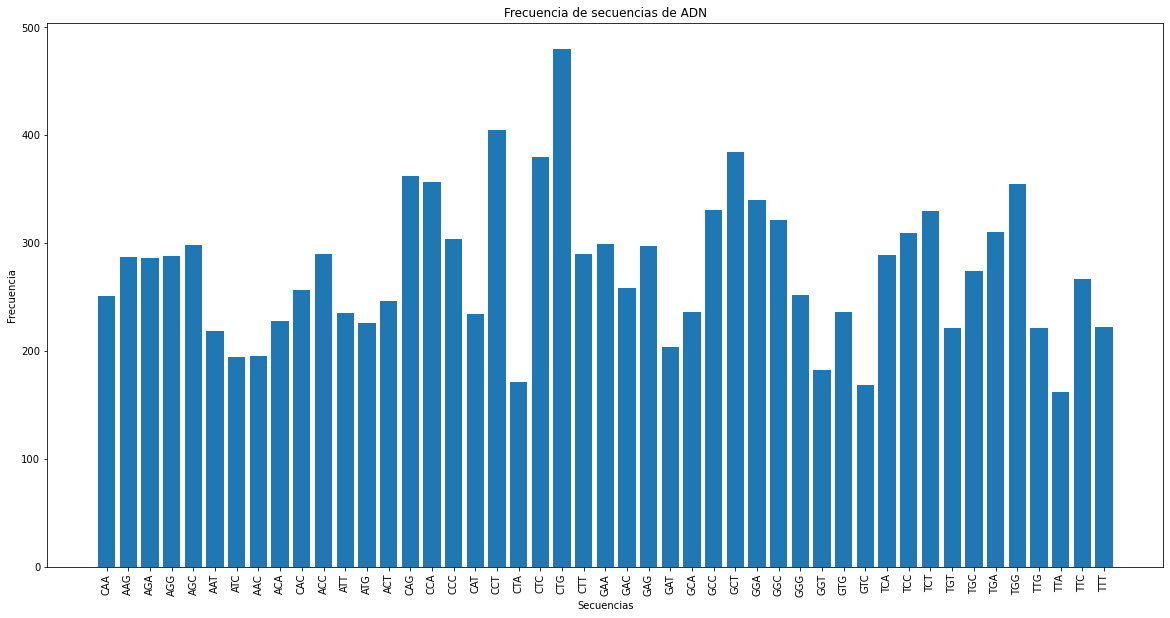

In [60]:
fig, ax = plt.subplots(figsize = (20,10))
ax.bar(seq_types3, seq_counts3)

# Configurar las etiquetas de los ejes y el título de la gráfica
ax.set_xlabel('Secuencias')
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de secuencias de ADN')

# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()

**Patrones Analizados**
- Los patrones que comienzan con el elemento 'A' y contienen el elemento 'G' se repiten en numeros muy cercanos entre si , es decir, ('A', 'A', 'G'): 287, ('A', 'G', 'A'): 286, ('A', 'G', 'G'): 288, ('A', 'G', 'C'): 298, queriendo decir que existe una fuerte correlación entre que dado el gen 'A', es probable que a continuación se de el gen 'G', independientemente si esta elegido en la 2º o 3º posición del patrón, por lo tanto el orden no importa tanto.

- Por otro lado los patrones que comienzan con el elemento 'T' y contienen el elemento 'G' son muy dispersos entre si, ('T', 'G', 'T'): 221, ('T', 'G', 'C'): 274 ,('T', 'G', 'A'): 310 ,('T', 'G', 'G'): 355 ,('T', 'T', 'G'): 221, queriendo decir que si que importa la en gran medida la posición en la que el gen 'G' es seleccionado  respecto al gen 'T'.



**Configuración 2 con soporte de 10%**

In [33]:
#Usa la libreia gsppy para utilizar el algoritmo GSP con un soporte mínimo especificado
result = GSP(lista).search(0.1)
for count in result:
    for k, v in count.items():
        print(f"{k}: {v}")
    print()

('A',): 2543
('G',): 2566
('C',): 2644
('T',): 2581

('A', 'C'): 936
('C', 'A'): 1163
('A', 'A'): 843
('A', 'G'): 1097
('C', 'G'): 474
('C', 'T'): 1433
('C', 'C'): 1103
('A', 'T'): 882
('G', 'A'): 1089
('G', 'C'): 1092
('G', 'G'): 980
('G', 'T'): 720
('T', 'G'): 1244
('T', 'C'): 1062
('T', 'A'): 598
('T', 'T'): 789

('C', 'A', 'G'): 362
('C', 'C', 'A'): 357
('G', 'C', 'C'): 331
('C', 'C', 'T'): 405
('G', 'C', 'T'): 384
('C', 'T', 'G'): 480
('C', 'T', 'C'): 380
('G', 'G', 'A'): 340
('G', 'G', 'C'): 321
('T', 'C', 'T'): 330
('T', 'G', 'G'): 355



**Configuración 3 con soporte de 20%**

In [34]:
#Usa la libreia gsppy para utilizar el algoritmo GSP con un soporte mínimo especificado
result = GSP(lista).search(0.2)
for count in result:
    for k, v in count.items():
        print(f"{k}: {v}")
    print()

('A',): 2543
('T',): 2581
('G',): 2566
('C',): 2644

('A', 'A'): 843
('C', 'T'): 1433
('A', 'C'): 936
('G', 'C'): 1092
('A', 'G'): 1097
('G', 'A'): 1089
('A', 'T'): 882
('G', 'T'): 720
('C', 'A'): 1163
('C', 'C'): 1103
('G', 'G'): 980
('T', 'G'): 1244
('T', 'C'): 1062
('T', 'T'): 789



**Configuración 4 con soporte de 30%**

In [35]:
#Usa la libreia gsppy para utilizar el algoritmo GSP con un soporte mínimo especificado
result = GSP(lista).search(0.3)
for count in result:
    for k, v in count.items():
        print(f"{k}: {v}")
    print()


('A',): 2543
('G',): 2566
('C',): 2644
('T',): 2581

('A', 'G'): 1097
('T', 'G'): 1244
('C', 'C'): 1103
('C', 'A'): 1163
('T', 'C'): 1062
('G', 'A'): 1089
('C', 'T'): 1433
('G', 'G'): 980
('G', 'C'): 1092

